<a href="https://colab.research.google.com/github/ayish1998/Demo-repo/blob/main/Accident_Severity_Predictionipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [310]:
#importing required libraries
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import pandas as pd
import os
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt #for visualisation
import seaborn as sns #for visualisation
from sklearn import preprocessing
sns.set(color_codes=True)

#The following line is needed to set backend if matplotlib to inline to view visuals in Jupyter Notenook
%matplotlib inline

#Load the data into pandas and check number of instances and attributes
data = pd.read_csv("Road.csv")
print (data.shape)
data.head()

(12316, 32)


,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [311]:
# Checking the state of our types
data.dtypes

Time                           object
Day_of_week                    object
Age_band_of_driver             object
Sex_of_driver                  object
Educational_level              object
Vehicle_driver_relation        object
Driving_experience             object
Type_of_vehicle                object
Owner_of_vehicle               object
Service_year_of_vehicle        object
Defect_of_vehicle              object
Area_accident_occured          object
Lanes_or_Medians               object
Road_allignment                object
Types_of_Junction              object
Road_surface_type              object
Road_surface_conditions        object
Light_conditions               object
Weather_conditions             object
Type_of_collision              object
Number_of_vehicles_involved     int64
Number_of_casualties            int64
Vehicle_movement               object
Casualty_class                 object
Sex_of_casualty                object
Age_band_of_casualty           object
Casualty_sev

In [312]:
#Data reading
data.shape
data.describe()

,Number_of_vehicles_involved,Number_of_casualties
count,12316.000000,12316.000000
mean,2.040679,1.548149
std,0.688790,1.007179
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


In [313]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [314]:
data.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')

In [315]:
#Rows containing duplicate data
duplicate_rows_data = data[data.duplicated()]
print ("number of dublicate rows: ", duplicate_rows_data.shape)

number of dublicate rows:  (0, 32)


In [316]:
#count the number of null values in each column
print(data.isnull().sum())

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

In [317]:
#Starting Our Data Preprocessing
#Dropping the NAN Values
data.dropna(inplace=True)

In [318]:
data['Age_band_of_driver'].unique()

array(['18-30', '31-50', 'Over 51', 'Unknown', 'Under 18'], dtype=object)

In [319]:
data['Casualty_severity'].unique()

array(['3', 'na', '2', '1'], dtype=object)

In [320]:
data['Driving_experience'].unique()

array(['Above 10yr', '1-2yr', '5-10yr', 'Below 1yr', '2-5yr',
       'No Licence', 'unknown'], dtype=object)

In [321]:
data['Pedestrian_movement'].unique()

array(["Crossing from driver's nearside", 'Not a Pedestrian',
       'Unknown or other',
       'Crossing from nearside - masked by parked or statioNot a Pedestrianry vehicle',
       'Walking along in carriageway, back to traffic',
       'Crossing from offside - masked by  parked or statioNot a Pedestrianry vehicle',
       'In carriageway, statioNot a Pedestrianry - not crossing  (standing or playing)',
       'In carriageway, statioNot a Pedestrianry - not crossing  (standing or playing) - masked by parked or statioNot a Pedestrianry vehicle'],
      dtype=object)

In [322]:
data['Accident_severity'].unique()

array(['Slight Injury', 'Serious Injury', 'Fatal injury'], dtype=object)

In [323]:
data['Cause_of_accident'].unique()

array(['Changing lane to the right', 'Moving Backward', 'No distancing',
       'No priority to vehicle', 'Overtaking', 'Other',
       'No priority to pedestrian', 'Changing lane to the left',
       'Driving carelessly', 'Turnover', 'Driving to the left',
       'Driving at high speed', 'Driving under the influence of drugs',
       'Getting off the vehicle improperly', 'Overturning', 'Overspeed',
       'Overloading', 'Improper parking', 'Drunk driving', 'Unknown'],
      dtype=object)

In [324]:
data['Time']

8        17:20:00
9        17:20:00
12       17:45:00
13       17:45:00
14       17:45:00
           ...   
12302    17:25:00
12303    12:48:00
12313    13:55:00
12314    13:55:00
12315    13:55:00
Name: Time, Length: 2889, dtype: object

In [325]:
#Modifying Time to required format
data['Time'] = pd.to_datetime(data['Time'], format='%H:%M:%S')
data['hour'] = data['Time'].dt.hour
data['minute'] = data['Time'].dt.minute

In [326]:
# Check if the columns exist in the DataFrame
data = data.drop(['Time','Educational_level','Vehicle_driver_relation','Owner_of_vehicle','Service_year_of_vehicle','Number_of_casualties','Work_of_casuality'],axis = 1)


In [327]:
from sklearn import preprocessing

def label_encode_columns(data, columns_to_encode):
    # Initialize a LabelEncoder
    label_encoder = preprocessing.LabelEncoder()

    # Iterate over each column to be encoded
    for column in columns_to_encode:
        # Fit and transform the column using LabelEncoder
        data[column] = label_encoder.fit_transform(data[column])

# Define the columns to be encoded
columns_to_encode = [
    'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver', 'Driving_experience',
    'Type_of_vehicle', 'Defect_of_vehicle', 'Area_accident_occured',
    'Lanes_or_Medians', 'Road_allignment', 'Types_of_Junction',
    'Road_surface_type', 'Road_surface_conditions', 'Light_conditions',
    'Weather_conditions', 'Type_of_collision', 'Number_of_vehicles_involved',
    'Vehicle_movement', 'Casualty_class', 'Sex_of_casualty',
    'Age_band_of_casualty', 'Casualty_severity', 'Fitness_of_casuality',
    'Pedestrian_movement', 'Cause_of_accident', 'Accident_severity'
]

# Apply label encoding to the specified columns
label_encode_columns(data, columns_to_encode)


In [328]:
data.head()

,Day_of_week,Age_band_of_driver,Sex_of_driver,Driving_experience,Type_of_vehicle,Defect_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,...,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity,hour,minute
8,0,0,1,3,5,2,4,6,4,7,...,2,1,4,2,2,0,1,2,17,20
9,0,0,1,0,0,2,8,4,4,7,...,1,1,0,2,2,5,9,1,17,20
12,4,0,1,0,11,2,6,0,0,1,...,3,2,5,3,2,5,10,2,17,45
13,4,1,1,2,5,2,6,6,4,1,...,3,2,5,3,2,5,12,2,17,45
14,4,1,1,3,0,2,6,4,0,1,...,0,0,0,2,2,5,10,1,17,45


In [329]:
# Checking the state of our types again here after the sorting
data.dtypes

Day_of_week                    int64
Age_band_of_driver             int64
Sex_of_driver                  int64
Driving_experience             int64
Type_of_vehicle                int64
Defect_of_vehicle              int64
Area_accident_occured          int64
Lanes_or_Medians               int64
Road_allignment                int64
Types_of_Junction              int64
Road_surface_type              int64
Road_surface_conditions        int64
Light_conditions               int64
Weather_conditions             int64
Type_of_collision              int64
Number_of_vehicles_involved    int64
Vehicle_movement               int64
Casualty_class                 int64
Sex_of_casualty                int64
Age_band_of_casualty           int64
Casualty_severity              int64
Fitness_of_casuality           int64
Pedestrian_movement            int64
Cause_of_accident              int64
Accident_severity              int64
hour                           int64
minute                         int64
d

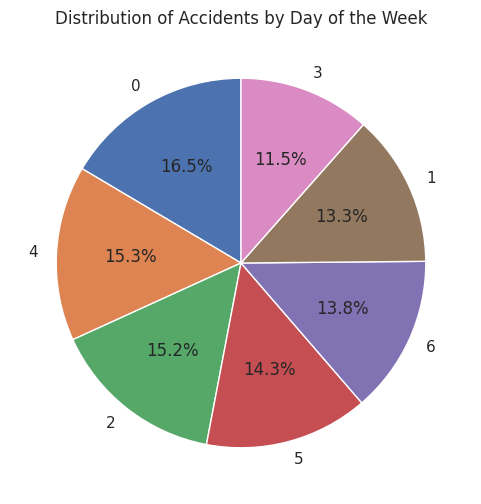

In [330]:
# Accidents on each day of the week
day_of_week_counts = data['Day_of_week'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(day_of_week_counts, labels=day_of_week_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Accidents by Day of the Week')
plt.show()

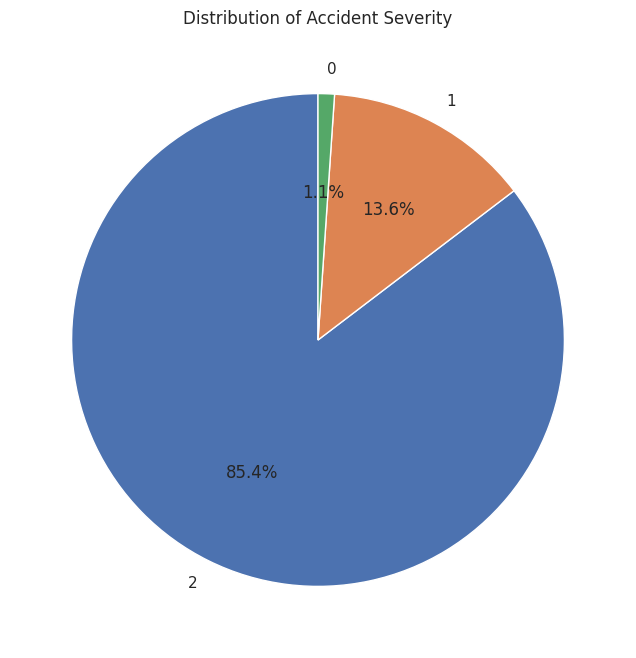

In [331]:
# Distribution of accident severity
accident_severity_counts = data['Accident_severity'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(accident_severity_counts, labels=accident_severity_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Accident Severity')
plt.show()

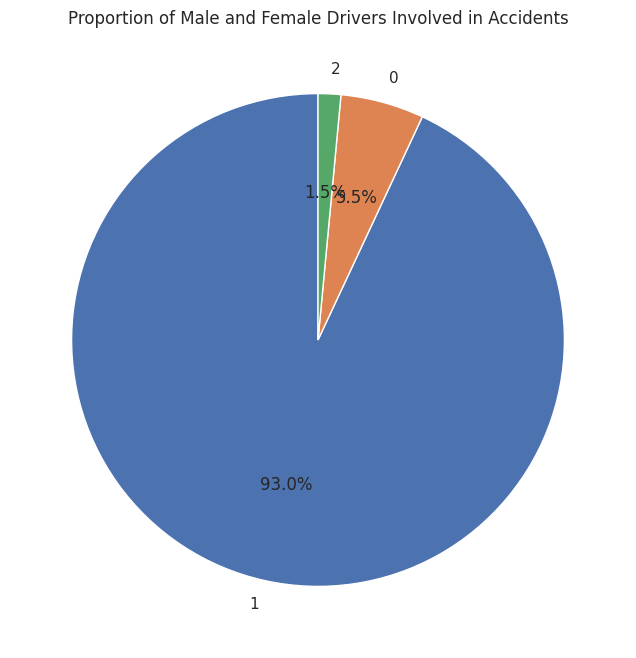

In [332]:
 #Proportion of male and female drivers involved in accidents (using a pie chart)
sex_of_driver_counts = data['Sex_of_driver'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(sex_of_driver_counts, labels=sex_of_driver_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Male and Female Drivers Involved in Accidents')
plt.show()

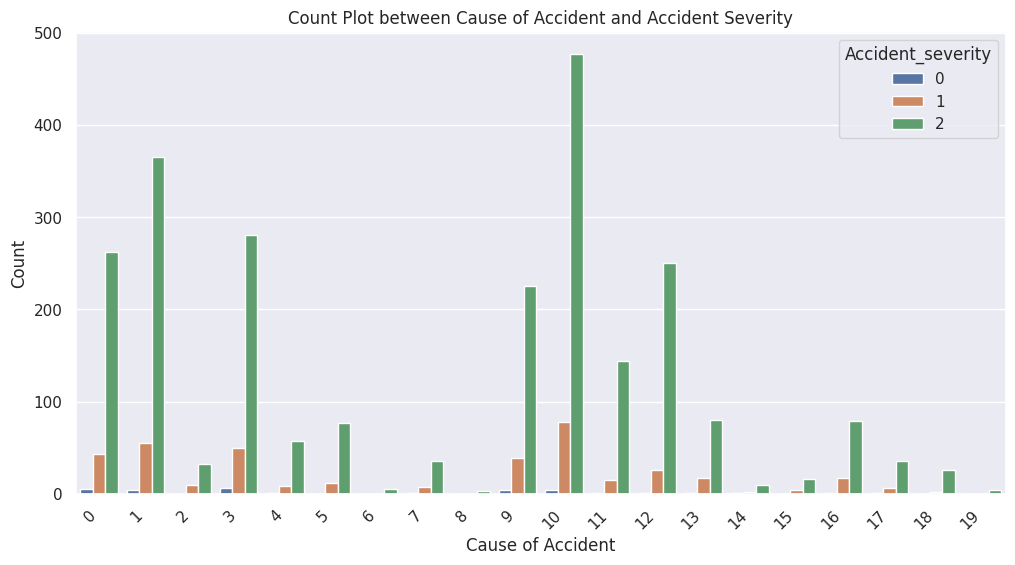

In [333]:
import seaborn as sns
import matplotlib.pyplot as plt




# Plotting count plot for 'Cause_of_accident'
plt.figure(figsize=(12, 6))
sns.countplot(x='Cause_of_accident', data=data, hue='Accident_severity')
plt.xlabel('Cause of Accident')
plt.ylabel('Count')
plt.title('Count Plot between Cause of Accident and Accident Severity')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Show the count plot
plt.show()


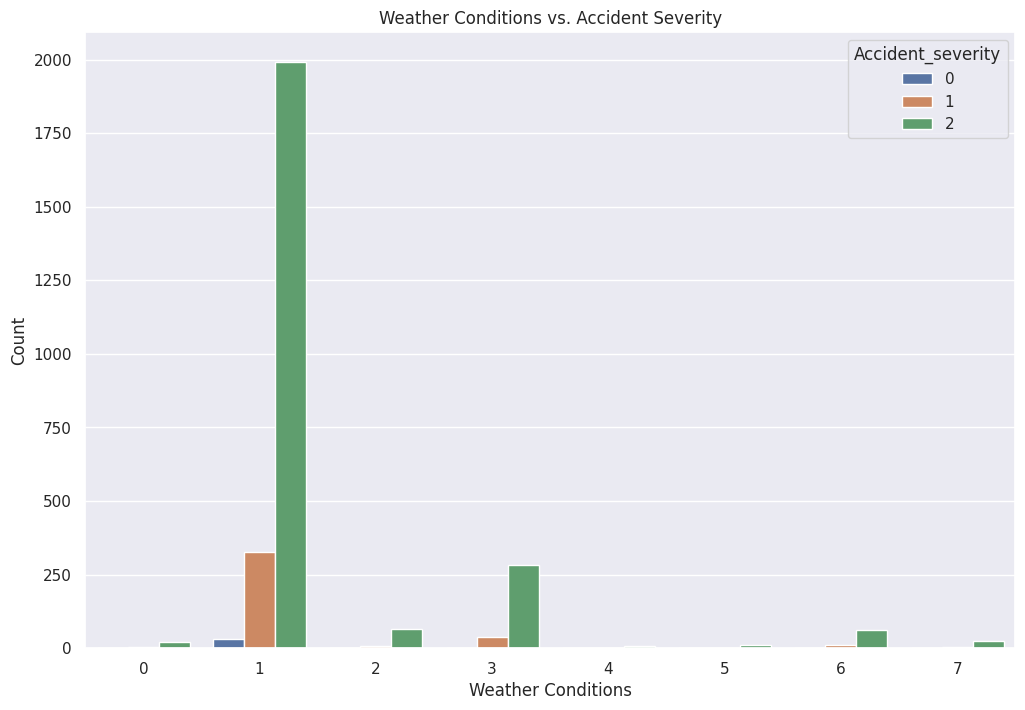

In [334]:
#Weather Conditions vs. Accident Severity
plt.figure(figsize=(12, 8))
sns.countplot(x='Weather_conditions', hue='Accident_severity', data=data)
plt.title('Weather Conditions vs. Accident Severity')
plt.xlabel('Weather Conditions')
plt.ylabel('Count')
plt.show()


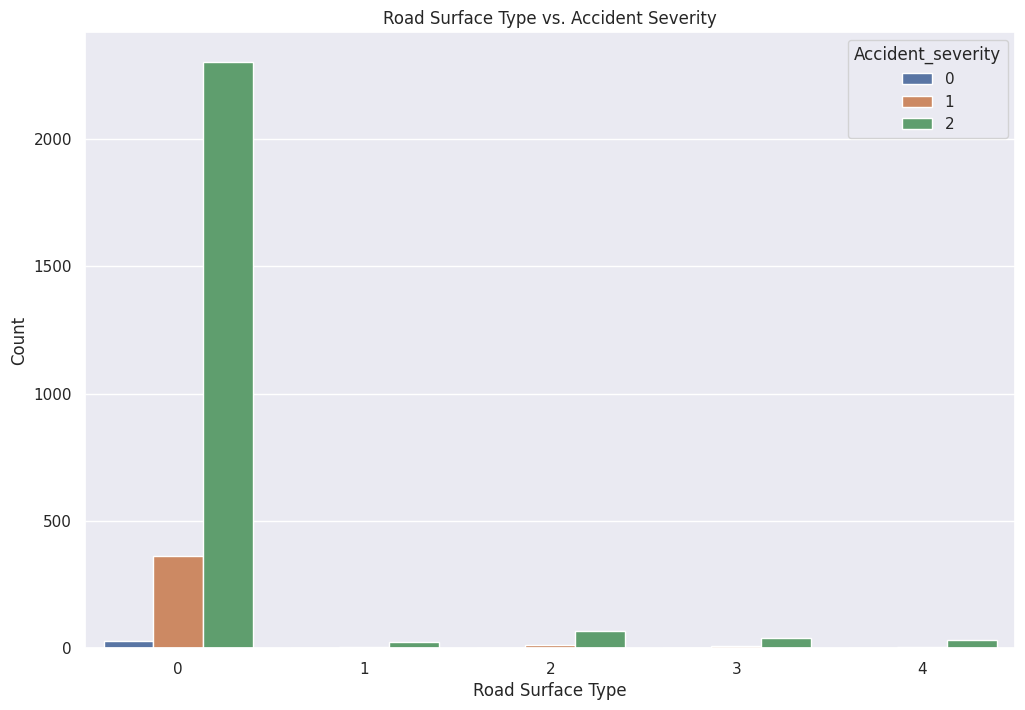

In [335]:
#Visualize the relationship between road surface type and accident severity.
plt.figure(figsize=(12, 8))
sns.countplot(x='Road_surface_type', hue='Accident_severity', data=data)
plt.title('Road Surface Type vs. Accident Severity')
plt.xlabel('Road Surface Type')
plt.ylabel('Count')
plt.show()


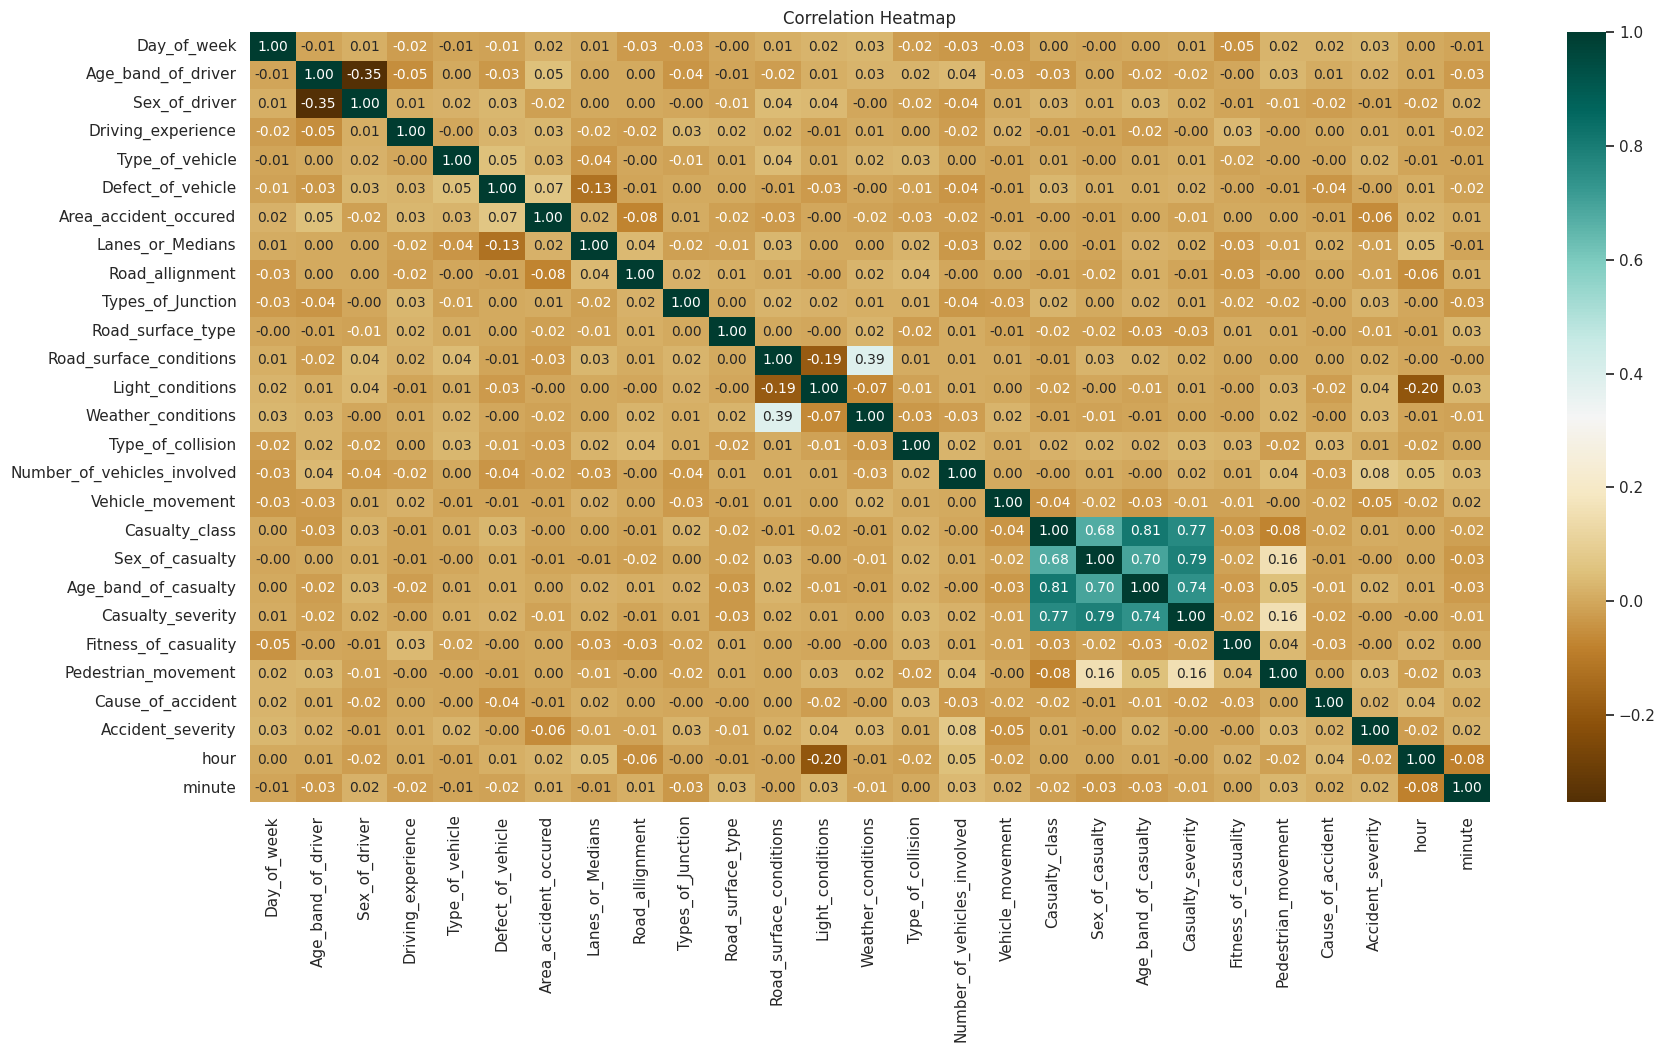

In [353]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame
plt.figure(figsize=(20, 10))
corl = data.corr()
sns.heatmap(corl, cmap="BrBG", annot=True, annot_kws={"size": 10}, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [337]:
# Visualizing data to perform analysis
X = data.drop(['Accident_severity'],axis =1)
Y = data['Accident_severity']

In [338]:
# Split dataset into training set and test set: 70% training and 30% testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=13)

In [339]:
# Importing the RandomForestClassifier and accuracy_score from scikit-learn
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Creating an instance of the RandomForestClassifier with 100 trees
RForest_clf = RandomForestClassifier(n_estimators=100)

# Training the RandomForestClassifier model on the training data
RForest_clf.fit(X_train, y_train)

# Making predictions on the test data
y_pred = RForest_clf.predict(X_test)

# Calculating the accuracy of the model on the test set
accuracy = accuracy_score(y_test, y_pred) * 100

# Printing the accuracy of the RandomForestClassifier model
print(f'Accuracy: {accuracy}')


Accuracy: 85.9447004608295


In [340]:
# Importing the XGBoost classifier and accuracy_score from scikit-learn
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Creating an instance of the XGBoost classifier
xgb_classifier = xgb.XGBClassifier()

# Training the XGBoost classifier model on the training data
xgb_classifier.fit(X_train, y_train)

# Making predictions on the test data
y_pred = xgb_classifier.predict(X_test)

# Calculating the accuracy of the model on the test set
accuracy = accuracy_score(y_test, y_pred) * 100

# Printing the accuracy of the XGBoost classifier model
print(f'Accuracy: {accuracy}')


Accuracy: 85.25345622119815


In [341]:
# Importing the Support Vector Machine (SVM) classifier and accuracy_score from scikit-learn
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
# Creating an instance of the Support Vector Machine (SVM) classifier
model = SVC()
# Training the SVM classifier model on the training data
model.fit(X_train, y_train)
# Making predictions on the test data
y_pred = model.predict(X_test)
# Calculating the accuracy of the model on the test set
accuracy = accuracy_score(y_test, y_pred) * 100
# Printing the accuracy of the SVM classifier model
print(f'Accuracy: {accuracy}')


Accuracy: 85.71428571428571


In [342]:
# Create an instance of the Support Vector Machine (SVM) classifier with different hyperparameters
model = SVC(kernel='rbf', C=1.0, gamma='scale')  # You can experiment with 'linear', 'poly', 'sigmoid', etc., for the kernel

# Train the SVM classifier model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the accuracy of the model on the test set
accuracy = accuracy_score(y_test, y_pred) * 100

# Print the accuracy of the SVM classifier model
print(f'Accuracy: {accuracy}')


Accuracy: 85.71428571428571


In [343]:
# Create an instance of the Support Vector Machine (SVM) classifier with different hyperparameters
model = SVC(kernel='linear', C=0.1, gamma='auto')  # You can experiment with other values for 'kernel', 'C', and 'gamma'

# Train the SVM classifier model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the accuracy of the model on the test set
accuracy = accuracy_score(y_test, y_pred) * 100

# Print the accuracy of the SVM classifier model
print(f'Accuracy: {accuracy}')


Accuracy: 85.71428571428571


In [344]:
# Create an instance of the Support Vector Machine (SVM) classifier with different hyperparameters
model = SVC(kernel='poly', C=0.1, gamma='scale')  # You can experiment with other values for 'kernel', 'C', and 'gamma'

# Train the SVM classifier model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the accuracy of the model on the test set
accuracy = accuracy_score(y_test, y_pred) * 100

# Print the accuracy of the SVM classifier model
print(f'Accuracy: {accuracy}')


Accuracy: 85.71428571428571


In [345]:
# Create an instance of the Support Vector Machine (SVM) classifier with different hyperparameters
model = SVC(kernel='rbf', C=1.0, gamma='scale')  # You can experiment with 'linear', 'poly', 'sigmoid', etc., for the kernel

# Train the SVM classifier model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the accuracy of the model on the test set
accuracy = accuracy_score(y_test, y_pred) * 100

# Print the accuracy of the SVM classifier model
print(f'Accuracy: {accuracy}')


Accuracy: 85.71428571428571


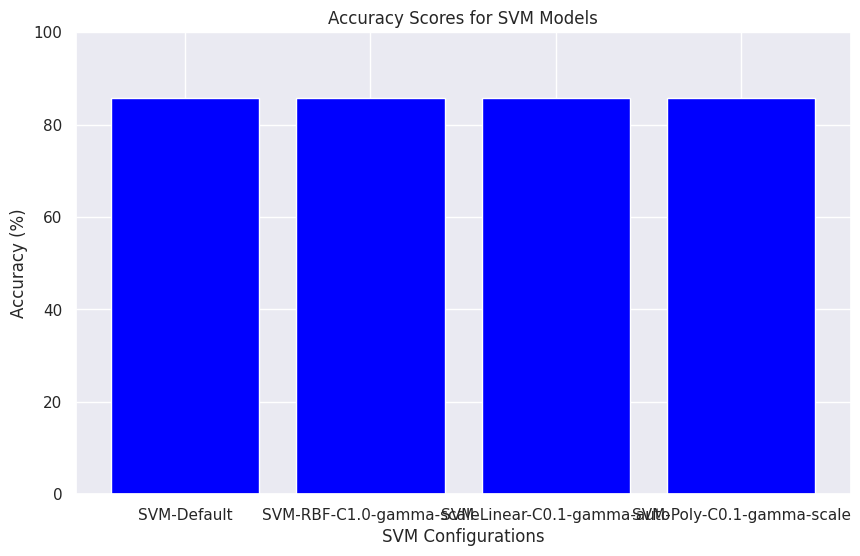

In [346]:
import matplotlib.pyplot as plt

# Replace the following placeholders with the actual accuracy scores from your SVM models
accuracy_default = 85.71  # Replace with the actual accuracy for the default SVM
accuracy_rbf = 85.71  # Replace with the actual accuracy for the RBF kernel SVM
accuracy_linear = 85.71  # Replace with the actual accuracy for the Linear kernel SVM
accuracy_poly = 85.71  # Replace with the actual accuracy for the Polynomial kernel SVM

# Accuracy scores for SVM models
svm_accuracies = [accuracy_default, accuracy_rbf, accuracy_linear, accuracy_poly]

# Different SVM configurations
svm_configs = ['SVM-Default', 'SVM-RBF-C1.0-gamma-scale', 'SVM-Linear-C0.1-gamma-auto', 'SVM-Poly-C0.1-gamma-scale']

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(svm_configs, svm_accuracies, color='blue')
plt.title('Accuracy Scores for SVM Models')
plt.xlabel('SVM Configurations')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)  # Set y-axis limits to match the accuracy scale
plt.show()


In [347]:
# Importing the Logistic Regression model from scikit-learn
from sklearn.linear_model import LogisticRegression

# Creating an instance of the Logistic Regression model
model = LogisticRegression()

# Training the model on the training data
model.fit(X_train, y_train)

# Making predictions on the test data
y_pred = model.predict(X_test)

# Calculating the accuracy of the model on the test set
accuracy = accuracy_score(y_test, y_pred) * 100

# Printing the accuracy
print(f'Accuracy: {accuracy}')


Accuracy: 85.71428571428571


In [348]:
# Importing the DecisionTreeClassifier and accuracy_score from scikit-learn
from sklearn import tree
# Creating an instance of the DecisionTreeClassifier
clf = tree.DecisionTreeClassifier()
# Training the DecisionTreeClassifier model on the training data
clf = clf.fit(X_train, y_train)
# Making predictions on the test data
y_pred = clf.predict(X_test)
# Calculating the accuracy of the model on the test set
accuracy = accuracy_score(y_test, y_pred) * 100
# Printing the accuracy of the DecisionTreeClassifier model
print(f'Accuracy: {accuracy}')


Accuracy: 76.95852534562212


Accuracy for Logistic Regression: 0.86
Accuracy for KNeighbors Classifier: 0.76
Accuracy for Random Forest: 0.86
Accuracy for Support Vector Machine: 0.86
Accuracy for XGBoost: 0.85


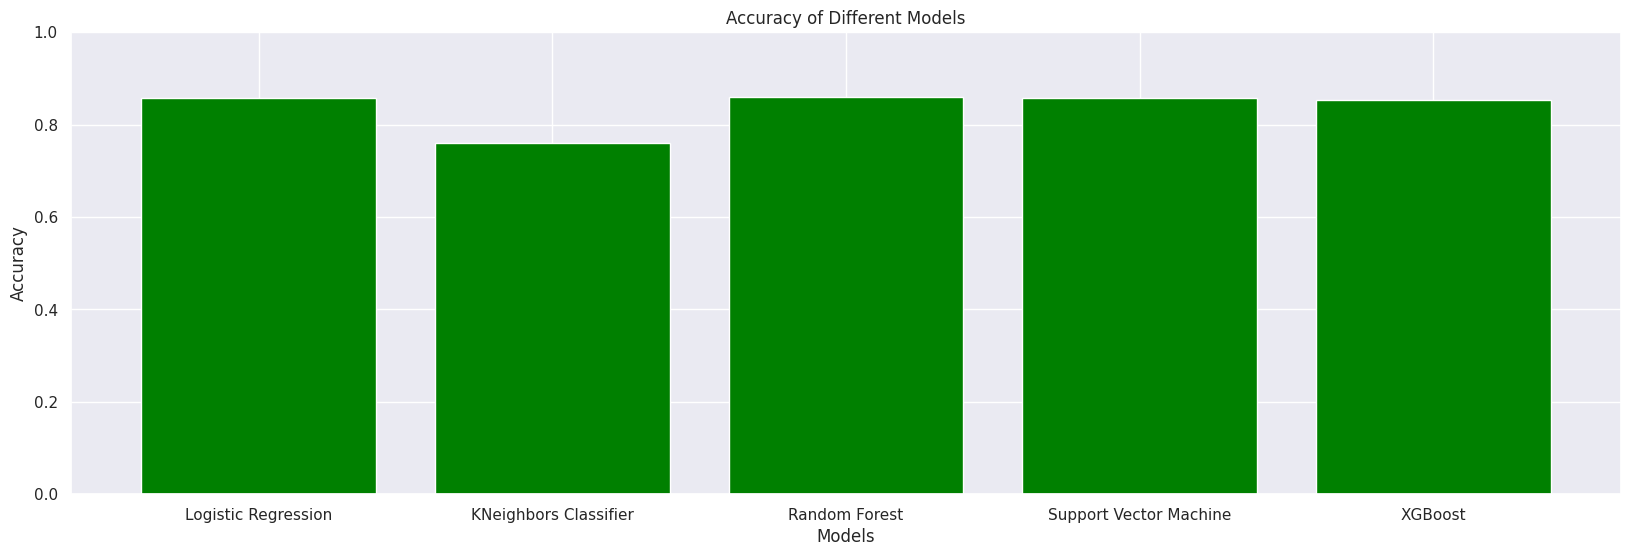

In [349]:
# Importing necessary libraries and modules
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Creating a dictionary of model names and corresponding instances
models = {
    'Logistic Regression': LogisticRegression(),
    'KNeighbors Classifier': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'XGBoost': xgb.XGBClassifier()
}

# List to store accuracies of each model
accuracies = []
# Looping through each model in the dictionary
for model_name, model in models.items():
    # Training the model on the training data
    model.fit(X_train, y_train)

    # Making predictions on the test data
    y_pred = model.predict(X_test)

    # Calculating the accuracy of the model on the test set
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

    # Printing the accuracy for each model
    print(f'Accuracy for {model_name}: {accuracy:.2f}')

# Creating a bar plot for the accuracies
plt.figure(figsize=(20, 6))
plt.bar(models.keys(), accuracies, color='Green')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.ylim([0, 1])
plt.show()


In [350]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from tensorflow.keras import models, layers, optimizers
# Generate synthetic data for demonstration purposes
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Define your model
input_dim = X_train.shape[1]

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(input_dim,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
optimizer = optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')


Epoch 1/10
22/22 [==============================] - 1s 8ms/step - loss: 0.7475 - accuracy: 0.4714 - val_loss: 0.7278 - val_accuracy: 0.5267
Epoch 2/10
22/22 [==============================] - 0s 3ms/step - loss: 0.7230 - accuracy: 0.5086 - val_loss: 0.7084 - val_accuracy: 0.5400
Epoch 3/10
22/22 [==============================] - 0s 2ms/step - loss: 0.7013 - accuracy: 0.5314 - val_loss: 0.6908 - val_accuracy: 0.5867
Epoch 4/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6820 - accuracy: 0.5629 - val_loss: 0.6741 - val_accuracy: 0.6267
Epoch 5/10
22/22 [==============================] - 0s 3ms/step - loss: 0.6637 - accuracy: 0.5914 - val_loss: 0.6595 - val_accuracy: 0.6333
Epoch 6/10
22/22 [==============================] - 0s 3ms/step - loss: 0.6473 - accuracy: 0.6371 - val_loss: 0.6442 - val_accuracy: 0.6667
Epoch 7/10
22/22 [==============================] - 0s 3ms/step - loss: 0.6308 - accuracy: 0.6800 - val_loss: 0.6307 - val_accuracy: 0.6800
Epoch 8/10
22/22 [==

In [351]:
# Define your model with different hyperparameters
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(input_dim,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model with a different learning rate
optimizer = optimizers.Adam(learning_rate=0.001)  # You can experiment with different learning rates
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with a different number of epochs
model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')


Epoch 1/30
22/22 [==============================] - 1s 8ms/step - loss: 0.5680 - accuracy: 0.7400 - val_loss: 0.4594 - val_accuracy: 0.8133
Epoch 2/30
22/22 [==============================] - 0s 3ms/step - loss: 0.3815 - accuracy: 0.8671 - val_loss: 0.3654 - val_accuracy: 0.8467
Epoch 3/30
22/22 [==============================] - 0s 3ms/step - loss: 0.3166 - accuracy: 0.8900 - val_loss: 0.3391 - val_accuracy: 0.8467
Epoch 4/30
22/22 [==============================] - 0s 3ms/step - loss: 0.2824 - accuracy: 0.9014 - val_loss: 0.3223 - val_accuracy: 0.8400
Epoch 5/30
22/22 [==============================] - 0s 2ms/step - loss: 0.2639 - accuracy: 0.8986 - val_loss: 0.3221 - val_accuracy: 0.8400
Epoch 6/30
22/22 [==============================] - 0s 4ms/step - loss: 0.2512 - accuracy: 0.9171 - val_loss: 0.3169 - val_accuracy: 0.8400
Epoch 7/30
22/22 [==============================] - 0s 3ms/step - loss: 0.2346 - accuracy: 0.9186 - val_loss: 0.3153 - val_accuracy: 0.8400
Epoch 8/30
22/22 [==

Epoch 1/10
22/22 [==============================] - 1s 7ms/step - loss: 0.7029 - accuracy: 0.5157 - val_loss: 0.7053 - val_accuracy: 0.5133
Epoch 2/10
22/22 [==============================] - 0s 3ms/step - loss: 0.6826 - accuracy: 0.5629 - val_loss: 0.6887 - val_accuracy: 0.5467
Epoch 3/10
22/22 [==============================] - 0s 3ms/step - loss: 0.6639 - accuracy: 0.6043 - val_loss: 0.6732 - val_accuracy: 0.5933
Epoch 4/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6467 - accuracy: 0.6400 - val_loss: 0.6577 - val_accuracy: 0.6200
Epoch 5/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6300 - accuracy: 0.6643 - val_loss: 0.6432 - val_accuracy: 0.6333
Epoch 6/10
22/22 [==============================] - 0s 3ms/step - loss: 0.6141 - accuracy: 0.7029 - val_loss: 0.6303 - val_accuracy: 0.6600
Epoch 7/10
22/22 [==============================] - 0s 2ms/step - loss: 0.5990 - accuracy: 0.7271 - val_loss: 0.6175 - val_accuracy: 0.6867
Epoch 8/10
22/22 [==

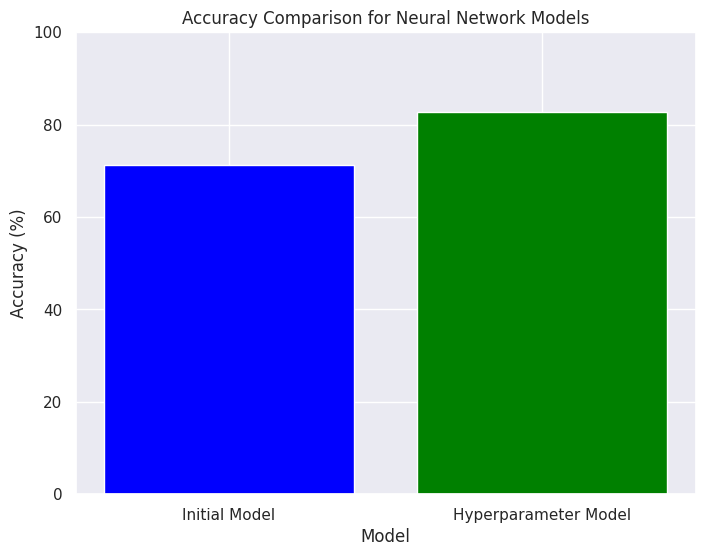

In [352]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from tensorflow.keras import models, layers, optimizers

# Generate synthetic data for demonstration purposes
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Define your initial model
input_dim = X_train.shape[1]
initial_model = models.Sequential()
initial_model.add(layers.Dense(64, activation='relu', input_shape=(input_dim,)))
initial_model.add(layers.Dense(32, activation='relu'))
initial_model.add(layers.Dense(1, activation='sigmoid'))

# Compile the initial model
optimizer = optimizers.Adam(learning_rate=0.0001)
initial_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the initial model
initial_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the initial model on the test set
test_loss_initial, test_accuracy_initial = initial_model.evaluate(X_test, y_test)
print(f'Initial Model Test Accuracy: {test_accuracy_initial * 100:.2f}%')

# Define your model with different hyperparameters
hyperparameter_model = models.Sequential()
hyperparameter_model.add(layers.Dense(128, activation='relu', input_shape=(input_dim,)))
hyperparameter_model.add(layers.Dense(64, activation='relu'))
hyperparameter_model.add(layers.Dense(1, activation='sigmoid'))

# Compile the hyperparameter model with a different learning rate
optimizer = optimizers.Adam(learning_rate=0.001)  # You can experiment with different learning rates
hyperparameter_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the hyperparameter model with a different number of epochs
hyperparameter_model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the hyperparameter model on the test set
test_loss_hyperparameter, test_accuracy_hyperparameter = hyperparameter_model.evaluate(X_test, y_test)
print(f'Hyperparameter Model Test Accuracy: {test_accuracy_hyperparameter * 100:.2f}%')

# Plotting the bar chart for accuracy comparison
models = ['Initial Model', 'Hyperparameter Model']
accuracies = [test_accuracy_initial * 100, test_accuracy_hyperparameter * 100]

plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['blue', 'green'])
plt.title('Accuracy Comparison for Neural Network Models')
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)  # Set y-axis limits to match the accuracy scale
plt.show()
